# Geometric Manipulation

Setelah bisa meload atau membuat bentuk geometri, sekarang kita akan mencoba mengubah atau memanipulasi bentuk geometri tersebut. Secara umum terdapat 3 bentuk perubahan yang dapat dilakukan pada data geometri:
1. **Metode Konstruktif**
2. **Transformasi Matrix**
3. **Interaksi dengan Geometri Lain**

penjabaran setiap metode yang tersedia di geopandas dapat dilihat pada link berikut (https://geopandas.org/en/stable/docs/user_guide/geometric_manipulations.html)

<h3>Metode Konstruktif</h3>
Metode ini memungkinkan kita untuk membuat geometri baru berdasarkan geometri yang sudah ada. Berikut adalah beberapa metode konstruktif utama:

1. **Buffer**: Membuat buffer di sekitar setiap geometri pada jarak tertentu. Ini bisa berguna dalam aplikasi seperti menentukan zona aman di sekitar lokasi berbahaya blasting.
2. **Boundary**: Mengembalikan batas dari setiap geometri. Ini dapat digunakan untuk menggambar batas wilayah administratif atau properti.
3. **Centroid**: Mengembalikan titik pusat dari setiap geometri.
4. **Convex Hull**: Mengembalikan poligon cembung terkecil yang dapat mengandung setiap geometri.
5. **Envelope**: Mengembalikan kotak pembatas dari setiap geometri. Ini berguna untuk membuat bounding box yang dapat digunakan dalam indeks spasial untuk mempercepat pencarian geometri.
6. **Union**: Mengembalikan suatu geometry hasil gabungan geometry-geomtry yang ada di dalam geoseries.


Buffered:
 0    POLYGON ((2 1, 1.99518 0.90198, 1.98079 0.8049...
1    POLYGON ((3 2, 2.99518 1.90198, 2.98079 1.8049...
2    POLYGON ((4 3, 3.99518 2.90198, 3.98079 2.8049...
dtype: geometry


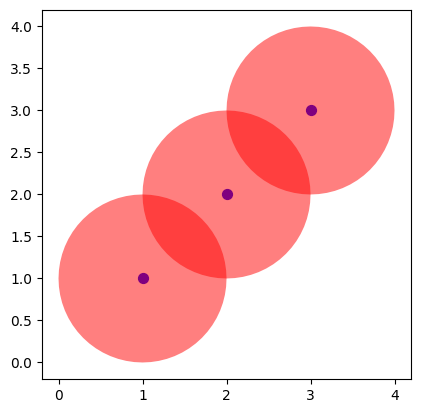

In [26]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# Membuat GeoSeries dengan beberapa geometri
titik = [Point(1, 1), Point(2, 2), Point(3, 3)]
poligon = [Polygon([(0, 0), (1, 0), (1, 1), (0, 1)]), Polygon([(2, 2), (3, 2), (3, 3), (2, 3)]), Polygon([(1.25, 1.25), (2.5, 0.5), (2.5, 2.5), (1.5, 1.5), (0.5, 2.5)])]

gdf_titik = gpd.GeoSeries(titik)
gdf_poligon = gpd.GeoSeries(poligon)

# Buffer
buffered = gdf_titik.buffer(1)

# Explore result
print("\nBuffered:\n", buffered)
fig, ax = plt.subplots()
gdf_titik.plot(ax=ax, color='blue', marker='o', markersize=50, label='Titik')
buffered.plot(ax=ax, color='red', alpha=0.5, label='Buffer')
plt.show()



Batas:
 0                 LINESTRING (0 0, 1 0, 1 1, 0 1, 0 0)
1                 LINESTRING (2 2, 3 2, 3 3, 2 3, 2 2)
2    LINESTRING (1.25 1.25, 2.5 0.5, 2.5 2.5, 1.5 1...
dtype: geometry


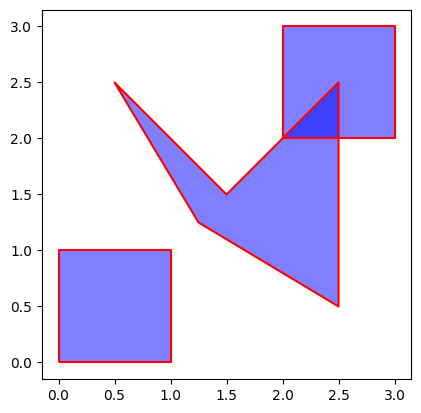

In [27]:
# Boundary
batas = gdf_poligon.boundary
print("\nBatas:\n", batas)

fig, ax = plt.subplots()
gdf_poligon.plot(ax=ax, color='blue', alpha=0.5 )
batas.plot(ax=ax, color='red')
plt.show()


Titik Pusat:
 0            POINT (0.5 0.5)
1            POINT (2.5 2.5)
2    POINT (1.91667 1.47222)
dtype: geometry


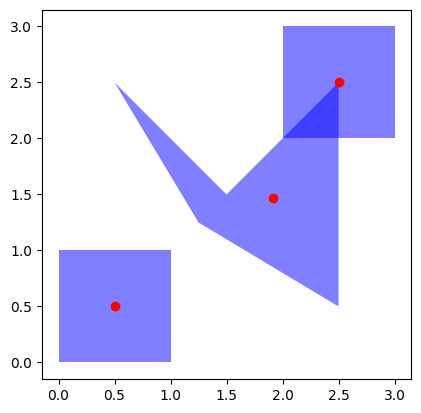

In [28]:
# Centroid
titik_pusat = gdf_poligon.centroid
print("\nTitik Pusat:\n", titik_pusat)

fig, ax = plt.subplots()
gdf_poligon.plot(ax=ax, color='blue', alpha=0.5 )
titik_pusat.plot(ax=ax, color='red')
plt.show()



Convex Hull:
 0                  POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))
1                  POLYGON ((2 2, 2 3, 3 3, 3 2, 2 2))
2    POLYGON ((2.5 0.5, 1.25 1.25, 0.5 2.5, 2.5 2.5...
dtype: geometry


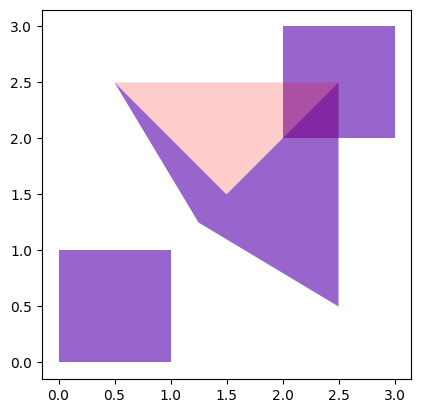

In [29]:
# Convex Hull
convex_hulls = gdf_poligon.convex_hull
print("\nConvex Hull:\n", convex_hulls)

fig, ax = plt.subplots()
gdf_poligon.plot(ax=ax, color='blue', alpha=0.5 )
convex_hulls.plot(ax=ax, color='red', alpha=0.2)
plt.show()


Envelope:
 0                  POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))
1                  POLYGON ((2 2, 3 2, 3 3, 2 3, 2 2))
2    POLYGON ((0.5 0.5, 2.5 0.5, 2.5 2.5, 0.5 2.5, ...
dtype: geometry


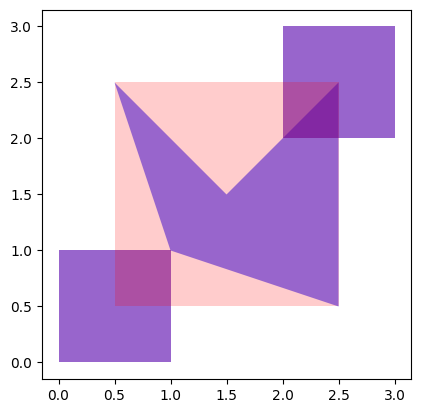

In [24]:
# Envelope
envelopes = gdf_poligon.envelope
print("\nEnvelope:\n", envelopes)

fig, ax = plt.subplots()
gdf_poligon.plot(ax=ax, color='blue', alpha=0.5 )
envelopes.plot(ax=ax, color='red', alpha=0.2)
plt.show()



In [43]:
# union_all
union = gdf_poligon.union_all()
print("Perhatikan hasilnya hanya geometri dan bukan geodataframe lagi karena tidak ada kolom indexnya")
print("\nUnion:\n", union)

Perhatikan hasilnya hanya geometri dan bukan geodataframe lagi karena tidak ada kolom indexnya

Union:
 MULTIPOLYGON (((0 1, 1 1, 1 0, 0 0, 0 1)), ((1.25 1.25, 0.5 2.5, 1.5 1.5, 2 2, 2 3, 3 3, 3 2, 2.5 2, 2.5 0.5, 1.25 1.25)))



result union intersect polygon:
                                             geometry
0                POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))
1  POLYGON ((2.5 0.5, 1.25 1.25, 0.5 2.5, 1.5 1.5...


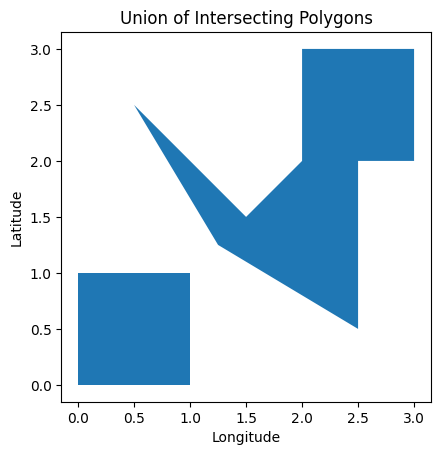

In [49]:
# berikut ini contoh untuk menggabungkan polygon yg bersentuhan saja
# INI HANYA CONTOH SEDERHANA KARENA TIDAK MENGHANDLE CASE CASCADING (INTERSECT BERANTAI)
def union_intersecting_geometries(gdf):
    unioned = []
    while not gdf.empty:
        geom = gdf.iloc[0]
        # cari yg intersect
        intersecting = gdf[gdf.geometry.intersects(geom)]
        union_geom = intersecting.union_all()
        unioned.append(union_geom)
        gdf = gdf.drop(intersecting.index)
    return gpd.GeoDataFrame(geometry=unioned)

# Perform the union operation
result_gdf = union_intersecting_geometries(gdf_poligon)

# Plot the result
print("\nresult union intersect polygon:\n",result_gdf)
result_gdf.plot()
plt.title('Union of Intersecting Polygons')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<h3>Transformasi matrix</h3>

seperti halnya objek matematis dalam ruang, geomteri dapat di transformasi menggunakan matrix (scale, translasi, skew, dan rotasi). Perubahan menggunakan matriks ini dinamakan **Affine Transformations**. Affine transform menggunakan input **[a, b, d, e, xoff, yoff]** yang merupakan element dari matriks sebagai berikut

$$
\begin{pmatrix}
x' \\
y' \\
1
\end{pmatrix}
=
\begin{pmatrix}
a & b & xoff \\
c & d & yoff \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$$

Atau kita bisa langsung menggunakan fungsi-fungsi yang dibuat berdasarkan Affine Transformation tersebut, berikut adalah beberapa fungsi yang memanfaatkan transformasi matrix:
1. **rotate** : merotasikan objek geometry sebesar sudut tertentu.
2. **scale** : memperbesar atau memperkecil ukuran pada arah sumbu x, y, z.
3. **skew** : memencengkan (shear) objek geometri dengan sudut tertentu pada arah x dan y.
4. **translate** : menggeser objek geometri dalam arah sumbu x, y, z.

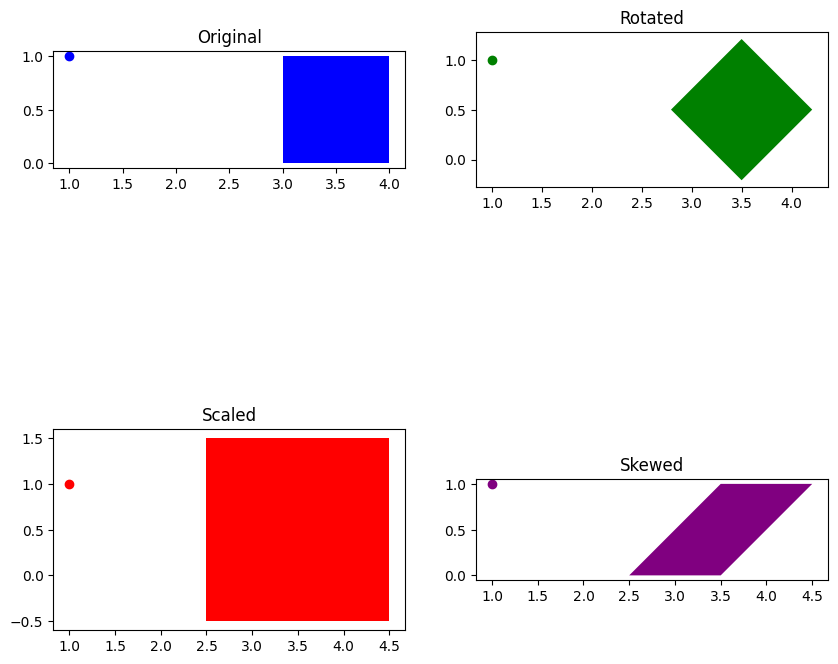

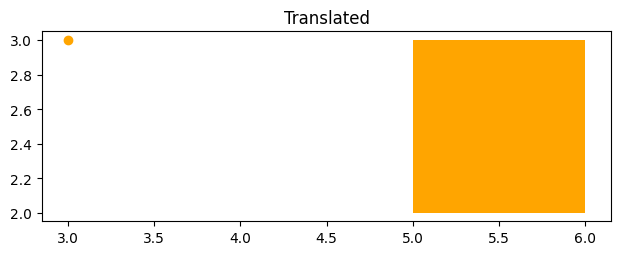

In [5]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# Create some geometric shapes
point = Point(1, 1)
polygon = Polygon([(3, 0), (4, 0), (4, 1), (3, 1)])

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'geometry': [point, polygon]})

gdf_rotated = gdf.rotate(45, origin='centroid')
gdf_scaled = gdf.scale(xfact=2, yfact=2, origin='centroid')
gdf_skewed = gdf.skew(45, origin='centroid')
gdf_translated = gdf.translate(xoff=2, yoff=2)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Original
gdf.plot(ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Original')

# Rotated
gdf_rotated.plot(ax=axs[0, 1], color='green')
axs[0, 1].set_title('Rotated')

# Scaled
gdf_scaled.plot(ax=axs[1, 0], color='red')
axs[1, 0].set_title('Scaled')

# Skewed
gdf_skewed.plot(ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Skewed')

# Translated
fig, ax = plt.subplots()
gdf_translated.plot(ax=ax, color='orange')
ax.set_title('Translated')

plt.tight_layout()
plt.show()


<h3>Interaksi dengan Geometri Lain</h3>

Geomtri baru bisa dibentuk dari interaksi spasial antara 2 atau lebih objek geomtri yang ada. Berikut adalah interaksi yang ada di dalam geopandas:
1. **intersection**
2. **union**
3. **symmetric_difference**
4. **difference**
   
![title](image/overlay_diagram.png)

**NOTE: Saat ini geopandas hanya mendukung data GeoDataFrames dengan jenis geometri yang seragam, yaitu hanya berisi (Multi)Polygon, atau hanya (Multi)Point, atau kombinasi dari bentuk (Multi)LineString dan LinearRing**

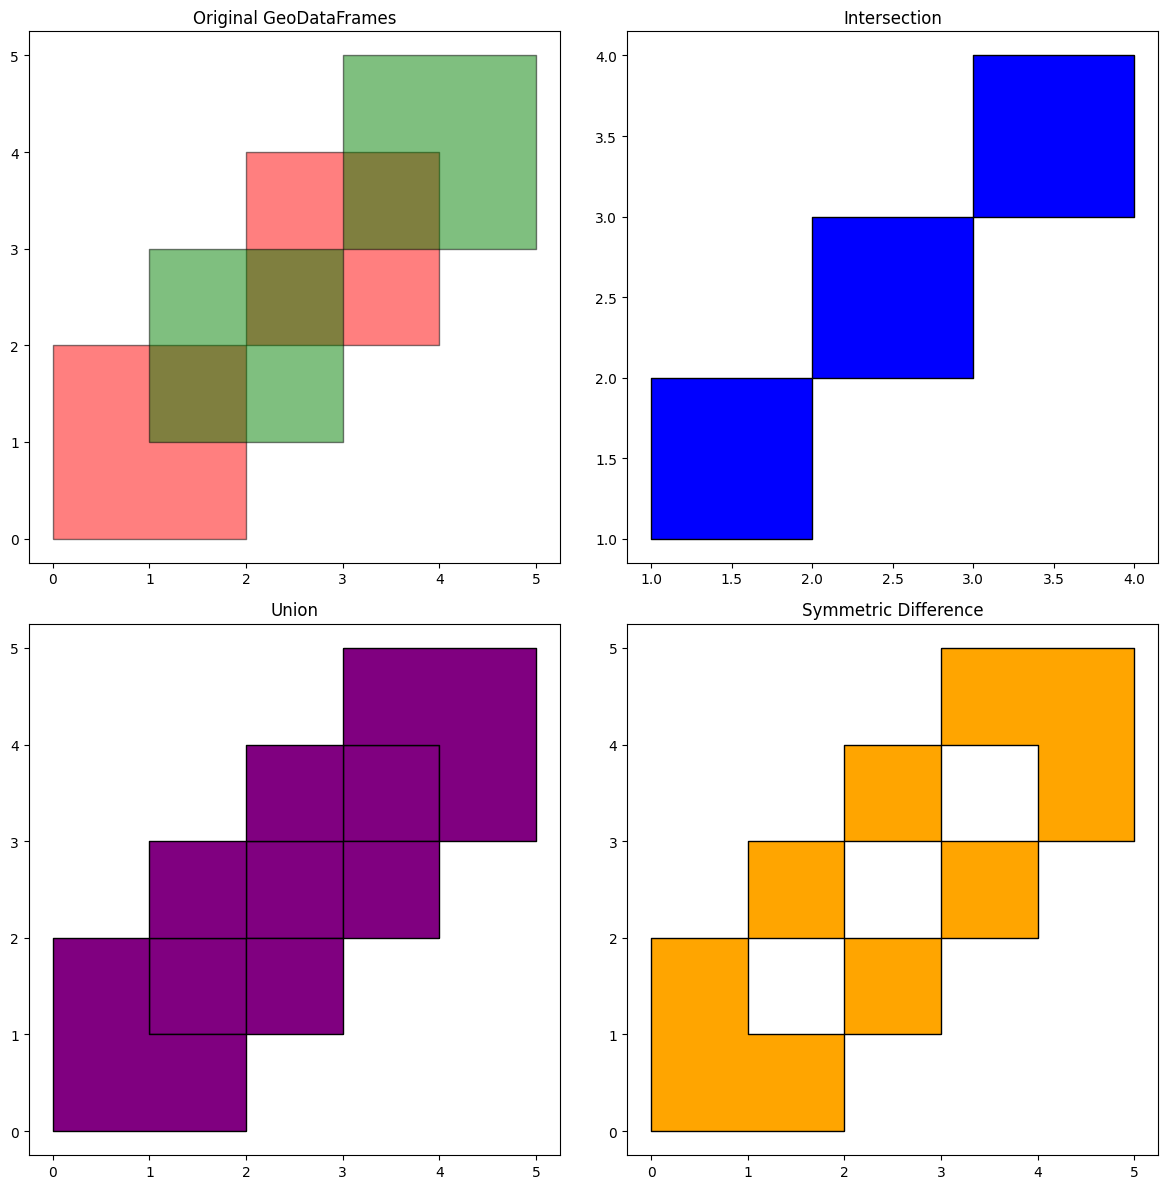

In [6]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Create some polygons
polys1 = gpd.GeoSeries([Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]),
                        Polygon([(2, 2), (4, 2), (4, 4), (2, 4)])])
polys2 = gpd.GeoSeries([Polygon([(1, 1), (3, 1), (3, 3), (1, 3)]),
                        Polygon([(3, 3), (5, 3), (5, 5), (3, 5)])])

# Create GeoDataFrames
df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1_data': [1, 2]})
df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2_data': [1, 2]})

# Intersection
intersection = gpd.overlay(df1, df2, how='intersection')

# Union
union = gpd.overlay(df1, df2, how='union')

# Symmetric Difference
sym_diff = gpd.overlay(df1, df2, how='symmetric_difference')

# Difference
difference = gpd.overlay(df1, df2, how='difference')

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Original GeoDataFrames
ax = df1.plot(ax=axs[0, 0], color='red', alpha=0.5, edgecolor='k')
df2.plot(ax=ax, color='green', alpha=0.5, edgecolor='k')
axs[0, 0].set_title('Original GeoDataFrames')

# Intersection
intersection.plot(ax=axs[0, 1], color='blue', edgecolor='k')
axs[0, 1].set_title('Intersection')

# Union
union.plot(ax=axs[1, 0], color='purple', edgecolor='k')
axs[1, 0].set_title('Union')

# Symmetric Difference
sym_diff.plot(ax=axs[1, 1], color='orange', edgecolor='k')
axs[1, 1].set_title('Symmetric Difference')

plt.tight_layout()
plt.show()
